# The Fama-French 5 Factor Model

In [1]:
import os

import pandas as pd

In [2]:
TICKER_PATH = '../indices/'

START_DATE = '2000-01-01'
END_DATE = '2019-12-31'

if not os.path.isdir(TICKER_PATH) or len(os.listdir(TICKER_PATH)) == 0:
    %run ../stock_script.py start=$START_DATE end=$END_DATE path=$TICKER_PATH

In [14]:
df_list = list()
i = 0
for file in os.listdir(TICKER_PATH):
    temp = pd.read_csv(TICKER_PATH+file, parse_dates=[0])
    temp['ticker'] = file.split('_')[0]
    df_list.append(temp)
    i += 1
    if i == 4:
        break

df = pd.concat(df_list)

In [15]:
from portfolio_functions.minimum_variance_portfolio import MinimumVariancePortfolio

In [16]:
mvp = MinimumVariancePortfolio(df)

Creating Frontier: 100%|█████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 83.63it/s]


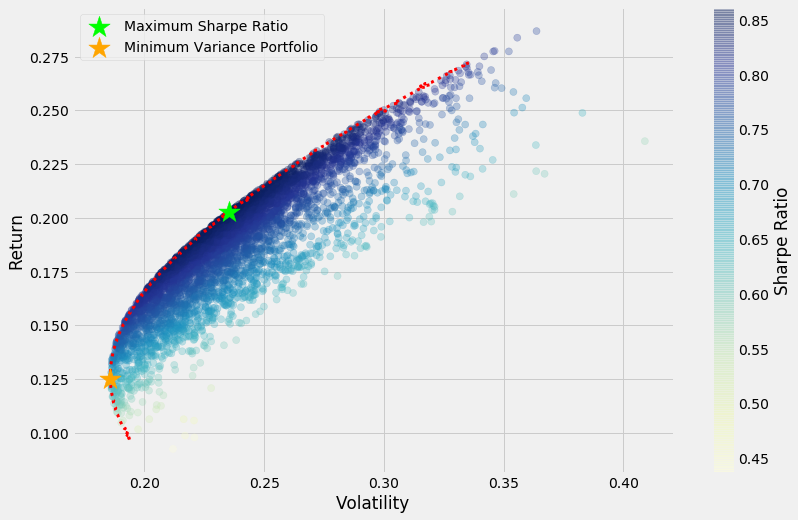

In [17]:
mvp.plot_minimum_variance_frontier(iters=5000, points=500)